In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
orders_df = pd.read_csv(".../Test task/orders.csv")

orders_df.head(5)

,order_id,customer_unique_id,timestamp
0,2e7a8482f6fb09756ca50c10d7bfc047,b7d76e111c89f7ebf14761390f0f7d17,2020-05-12 04:33:06
1,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,2020-05-12 05:01:25
2,3b697a20d9e427646d92567910af6d57,32ea3bdedab835c3aa6cb68ce66565ef,2020-05-12 05:18:28
3,36989eb07a0de2d3d3129eea35553875,f176923a0a4ab546c7287791ccb82193,2020-05-12 05:22:00
4,60762802b48bb6d256d55b013d115013,0b3dc7efaafb0cf78a4796d42fa8d74c,2020-05-12 05:36:03


In [5]:
orders_df.shape

(15115, 3)

In [7]:
order_items_df = pd.read_csv(".../Test task/order_items.csv")

order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,price
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90
1,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90
2,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90
3,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33
4,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33


In [8]:
order_items_df.shape

(29099, 5)

In [12]:
print(orders_df['customer_unique_id'].value_counts())

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
040875d34dfc46856372e6beaabf5505     1
9bca37310a1cc59159af130954a00334     1
547ef152d14479db29e8961775147a7d     1
ffbb6557e45f7158781514f0efddb0d5     1
5c58de6fb80e93396e2f35642666b693     1
Name: customer_unique_id, Length: 11869, dtype: int64


In [17]:
print(order_items_df['price'].value_counts())

59.90     873
49.90     614
69.90     489
39.90     434
29.90     421
         ... 
969.99      1
395.00      1
155.50      1
404.88      1
218.98      1
Name: price, Length: 2524, dtype: int64


In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29099 entries, 0 to 29098
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29099 non-null  object 
 1   order_item_id  29099 non-null  int64  
 2   product_id     29099 non-null  object 
 3   seller_id      29099 non-null  object 
 4   price          29099 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


In [24]:
# Merge datasets
df = pd.merge(orders_df, order_items_df, on='order_id', how='left')

df.head(3)

,order_id,customer_unique_id,timestamp,order_item_id,product_id,seller_id,price
0,2e7a8482f6fb09756ca50c10d7bfc047,b7d76e111c89f7ebf14761390f0f7d17,2020-05-12 04:33:06,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99
1,2e7a8482f6fb09756ca50c10d7bfc047,b7d76e111c89f7ebf14761390f0f7d17,2020-05-12 04:33:06,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90
2,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,2020-05-12 05:01:25,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99


In [25]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y%m%d', errors='ignore')

In [30]:
# Dates to categoty
df['timestamp'] = df['timestamp'].astype('category')

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

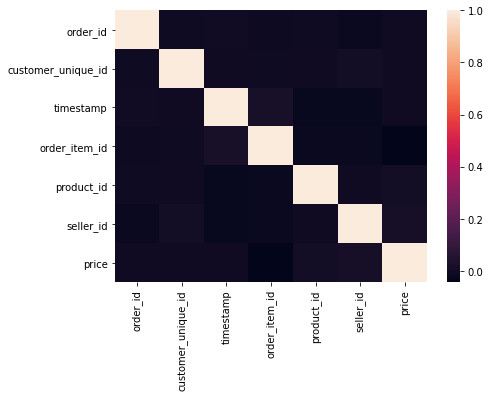

In [31]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

## Random Forest

In [55]:
# Model with the best estimator
model = RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'order_item_id']], df.order_item_id)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'order_item_id'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

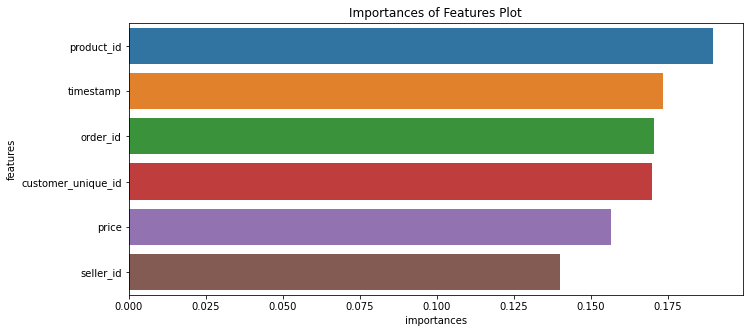

In [57]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [58]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

<ipython-input-58-e0603b15f65c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)


In [59]:
# Selected columns
df.columns

Index(['order_id', 'customer_unique_id', 'timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price'],
      dtype='object')

## XGboost

In [60]:
# Train & Test split
target = df.pop('order_item_id')
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)

In [84]:
# Create model
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, min_samples_leaf=1, n_estimators=150)
model.fit(train_data, train_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [85]:
# Predicting
predict_labels = model.predict(test_data)

In [86]:
print(classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           1       0.53      1.00      0.69      4613
           2       0.00      0.00      0.00      2899
           3       0.00      0.00      0.00       666
           4       0.00      0.00      0.00       266
           5       0.00      0.00      0.00       137
           6       0.00      0.00      0.00        79
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
